In [67]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

In [68]:
# Import CSV to DataFrame
df = pd.read_csv('profiles.csv')

In [112]:
# Peak at the data 
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [70]:
list(df.columns)

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

In [71]:
# Check for missing data
df.isnull().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

Age, income, last_online, location, sex, orientation, sex and status are the only columns with no missing values.
This could be because some are automatically generated like last_online and location.
I am interested in the drugs column

<Axes: xlabel='age', ylabel='Count'>

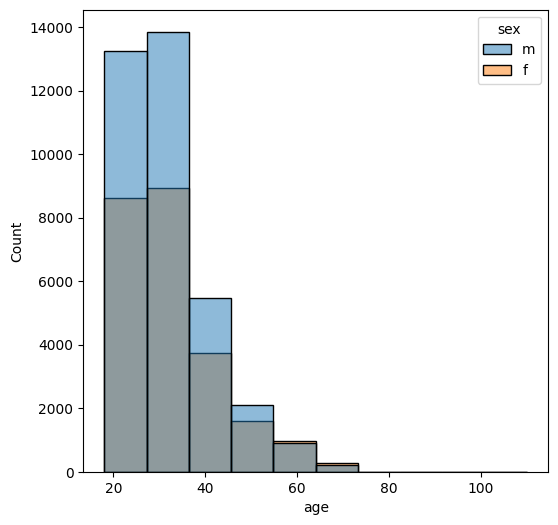

In [110]:
fig, ax = plt.subplots()
sns.histplot(data=df, x='age', hue='sex', bins=10)

This histogramn shows the distribution of male and female. We see that males are weighted more than females in this data
Also we can see that the majority of ages are between 20 and 40.

In [111]:
df.drugs.value_counts()

drugs
never        37724
sometimes     7732
often          410
Name: count, dtype: int64

In [72]:
# Prep data for model selection
cols = ['age', 'sex', 'smokes', 'drinks', 'body_type', 'education', 'drugs']
data = df[cols].dropna()
data.shape

(35991, 7)

For our tests now I have selected 5 feature columns and out testing column and dropped all missing values to have a complete dataset

In [73]:
#Get dummy variables to make it numeric
for col in cols[:-1]:
   data = pd.get_dummies(data, columns=[col], dtype=int)

In [74]:
data.head()

,drugs,age_18,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,...,education_space camp,education_two-year college,education_working on college/university,education_working on high school,education_working on law school,education_working on masters program,education_working on med school,education_working on ph.d program,education_working on space camp,education_working on two-year college
0,never,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,sometimes,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,never,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,never,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,never,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Now our model has 110 columns to train and predict on.

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

y = data['drugs']
X = data.drop(['drugs'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()


model = DecisionTreeClassifier(max_depth=25)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       never       0.85      0.95      0.90      5888
       often       0.13      0.06      0.08        64
   sometimes       0.46      0.20      0.28      1247

    accuracy                           0.81      7199
   macro avg       0.48      0.41      0.42      7199
weighted avg       0.77      0.81      0.78      7199



In [76]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       never       0.85      0.97      0.91      5888
       often       0.40      0.03      0.06        64
   sometimes       0.57      0.21      0.31      1247

    accuracy                           0.83      7199
   macro avg       0.61      0.40      0.42      7199
weighted avg       0.80      0.83      0.79      7199



After using a Logistic Regression model and a Decision Tree Classifier it can be conlcuded that a Logistic Regression model is more accurate in testing. The support data for a person who has marked never for doing drugs is much higher than the other two options. So the predictions for someone who has never done can be derived accuratley from this data.

In [77]:
# Setup new x and y, lets see if we can predict Income 
data2 = df[['age', 'sex', 'education', 'job', 'offspring', 'income']]
ft_cols = ['age', 'sex', 'education', 'job', 'offspring']


data2 = data2.dropna()
data2.isnull().sum()

age          0
sex          0
education    0
job          0
offspring    0
income       0
dtype: int64

In [78]:
for col in ft_cols:
   data2 = pd.get_dummies(data2, columns=[col], dtype=int)


In [80]:
data2.head()

,income,age_18,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,...,offspring_has a kid,"offspring_has a kid, and might want more","offspring_has a kid, and wants more","offspring_has a kid, but doesn&rsquo;t want more",offspring_has kids,"offspring_has kids, and might want more","offspring_has kids, and wants more","offspring_has kids, but doesn&rsquo;t want more",offspring_might want kids,offspring_wants kids
0,-1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20000,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
y = data2['income']
x = data2.drop(['income'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state=0)

In [87]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
print(classification_report(y_test, pred, zero_division=0))

              precision    recall  f1-score   support

          -1       0.75      0.99      0.86      3146
       20000       0.38      0.06      0.10       258
       30000       0.00      0.00      0.00        92
       40000       0.00      0.00      0.00        91
       50000       0.00      0.00      0.00       102
       60000       0.00      0.00      0.00        66
       70000       0.00      0.00      0.00        73
       80000       0.00      0.00      0.00        88
      100000       0.00      0.00      0.00       152
      150000       0.00      0.00      0.00        54
      250000       0.00      0.00      0.00        11
      500000       0.00      0.00      0.00         6
     1000000       0.00      0.00      0.00        48

    accuracy                           0.75      4187
   macro avg       0.09      0.08      0.07      4187
weighted avg       0.59      0.75      0.65      4187



This classification report tells us that there is not enough data to accuratley predict a persons income from there there because all of the values are not represented enough. The -1 im assuming is just a placeholder for a null value.